In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
                                    StratifiedKFold,
                                    cross_validate
                                    )
from sklearn.metrics import (
                            confusion_matrix,
                            f1_score,
                            precision_score,
                            recall_score,
                            accuracy_score
                            )
warnings.filterwarnings('ignore')

### 1. Load Data


In [62]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

### 2. Configure k-Fold CV

In [63]:
cv = StratifiedKFold(
                      n_splits =6,
                      random_state=42,
                      shuffle= True
                    )



In [64]:
model_lr = LogisticRegression(
                              random_state = 42,
                              max_iter= 1000
                            )

In [65]:
cv_results = cross_validate(
                            model_lr,
                            X_train,
                            Y_train,
                            cv =cv, scoring= 'accuracy',
                            return_train_score= True
                          )

In [66]:
score_arr = ['accuracy', 'precision', 'recall', 'f1']
for score in score_arr:
    cv_results = cross_validate(
        model_lr,
        X_train,
        Y_train,
        cv=cv,
        scoring =score,
        return_train_score=True
    )
  
    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)
    print(f"{score} : {test_score_avg}")


accuracy : 0.7306608765891984
precision : 0.728767491464764
recall : 0.7349241825841353
f1 : 0.7318169755021501


In [67]:
cv_results = cross_validate(
                            model_lr,
                            X_train,
                            Y_train,
                            cv =cv, scoring= 'f1',
                            return_train_score= False
                          )

cv_results

{'fit_time': array([0.01100135, 0.01301193, 0.01129436, 0.00998235, 0.01016521,
        0.01116061]),
 'score_time': array([0.0050025 , 0.00398326, 0.00201821, 0.00300241, 0.00101733,
        0.00135732]),
 'test_score': array([0.73789174, 0.71247059, 0.73377234, 0.74063537, 0.72795851,
        0.7381733 ])}

In [68]:
best_index =np.argmax(cv_results['test_score'])

fold_indices = list(cv.split(X_train, Y_train))

best_train_idx, best_test_idx = fold_indices[best_index]

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]



In [69]:
model_lr = LogisticRegression(
                              random_state = 42,
                              max_iter= 1000
                            )

model_lr.fit(X_train_best, Y_train_best)

LogisticRegression(max_iter=1000, random_state=42)

In [70]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)


In [71]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [72]:
print (f"accuracy : {accuracy}")
print (f"precision : {precision}")
print (f"recall : {recall}")
print (f"f1_score : {f1_score}")

accuracy : 0.6948474237118559
precision : 0.3392857142857143
recall : 0.6569148936170213
f1_score : 0.447463768115942


<Axes: >

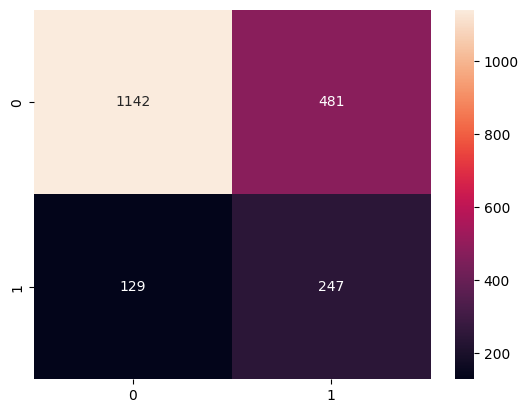

In [22]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap (cm, annot=True, fmt ='d')